In [1]:
%matplotlib inline
import numpy as np
import src.io as io
import src.components as cmpnt

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 1. Loading dataset
we continue here after a first exploration of Component Analyses in another notebook

In [31]:
keyword = 'init_c2_c2_c4'

In [32]:
traj, ids = io.load_dataset(keyword)

# 2. Filtering the dataset
Strong from our previous observation, we see that we can not give the whole space, meaning we need to come up with a way to feed relevant PCs for the ICA to identify relevant directions. 

A possible approach could be the iterative one that follows:

1. **Outlier detection**: 
we run PCA, truncate at a given threshold, do ICA there, and remove any point that lies on any IC with a coordinated superior to a value close to one. Repeat until no point is removed.

2. **Signal extraction**:
for ICs with high enough negentropy, it seems doable to isolate not-quite-outliers which will be representative of the ICs. Later we will try window scanning approach in resulting PC space

In [33]:
# parameters identified
jobname='init_c2_c2_c4_'
pc_thresh=0.75

## 2.1. Outlier removal

Iteration # 0
Principal Component Analysis (step 0)


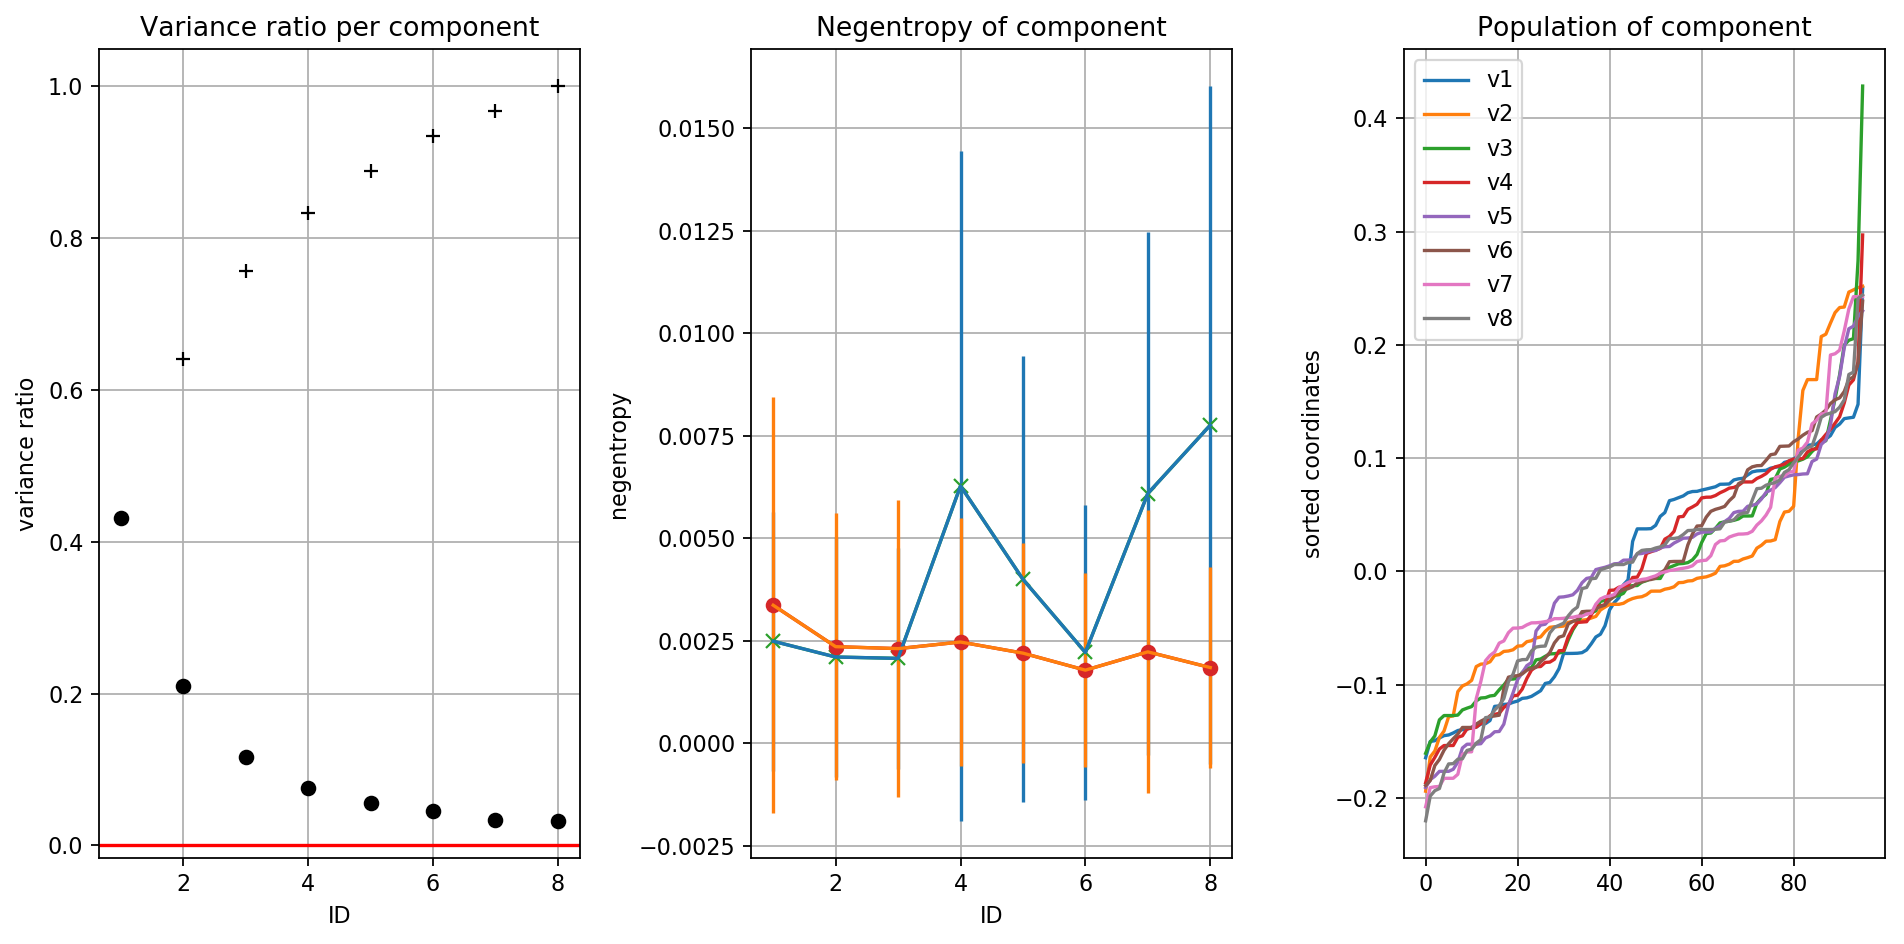

Independent Component Analysis (step 1)


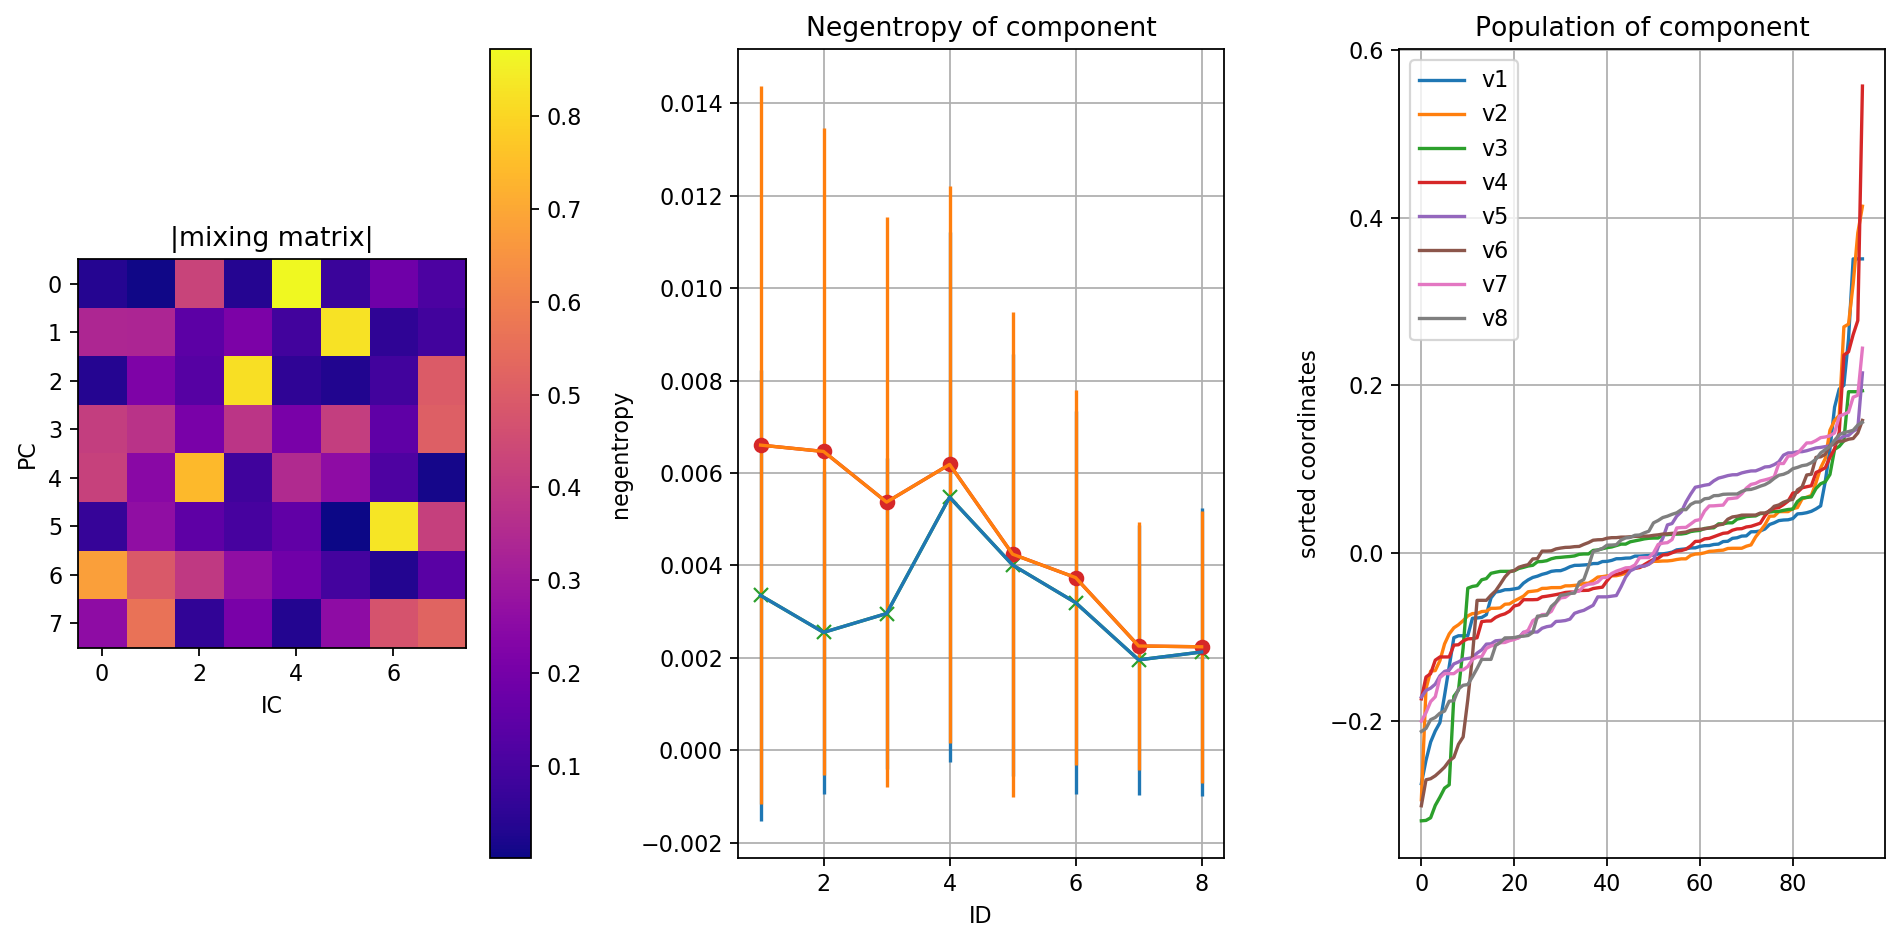

projection of data in component space


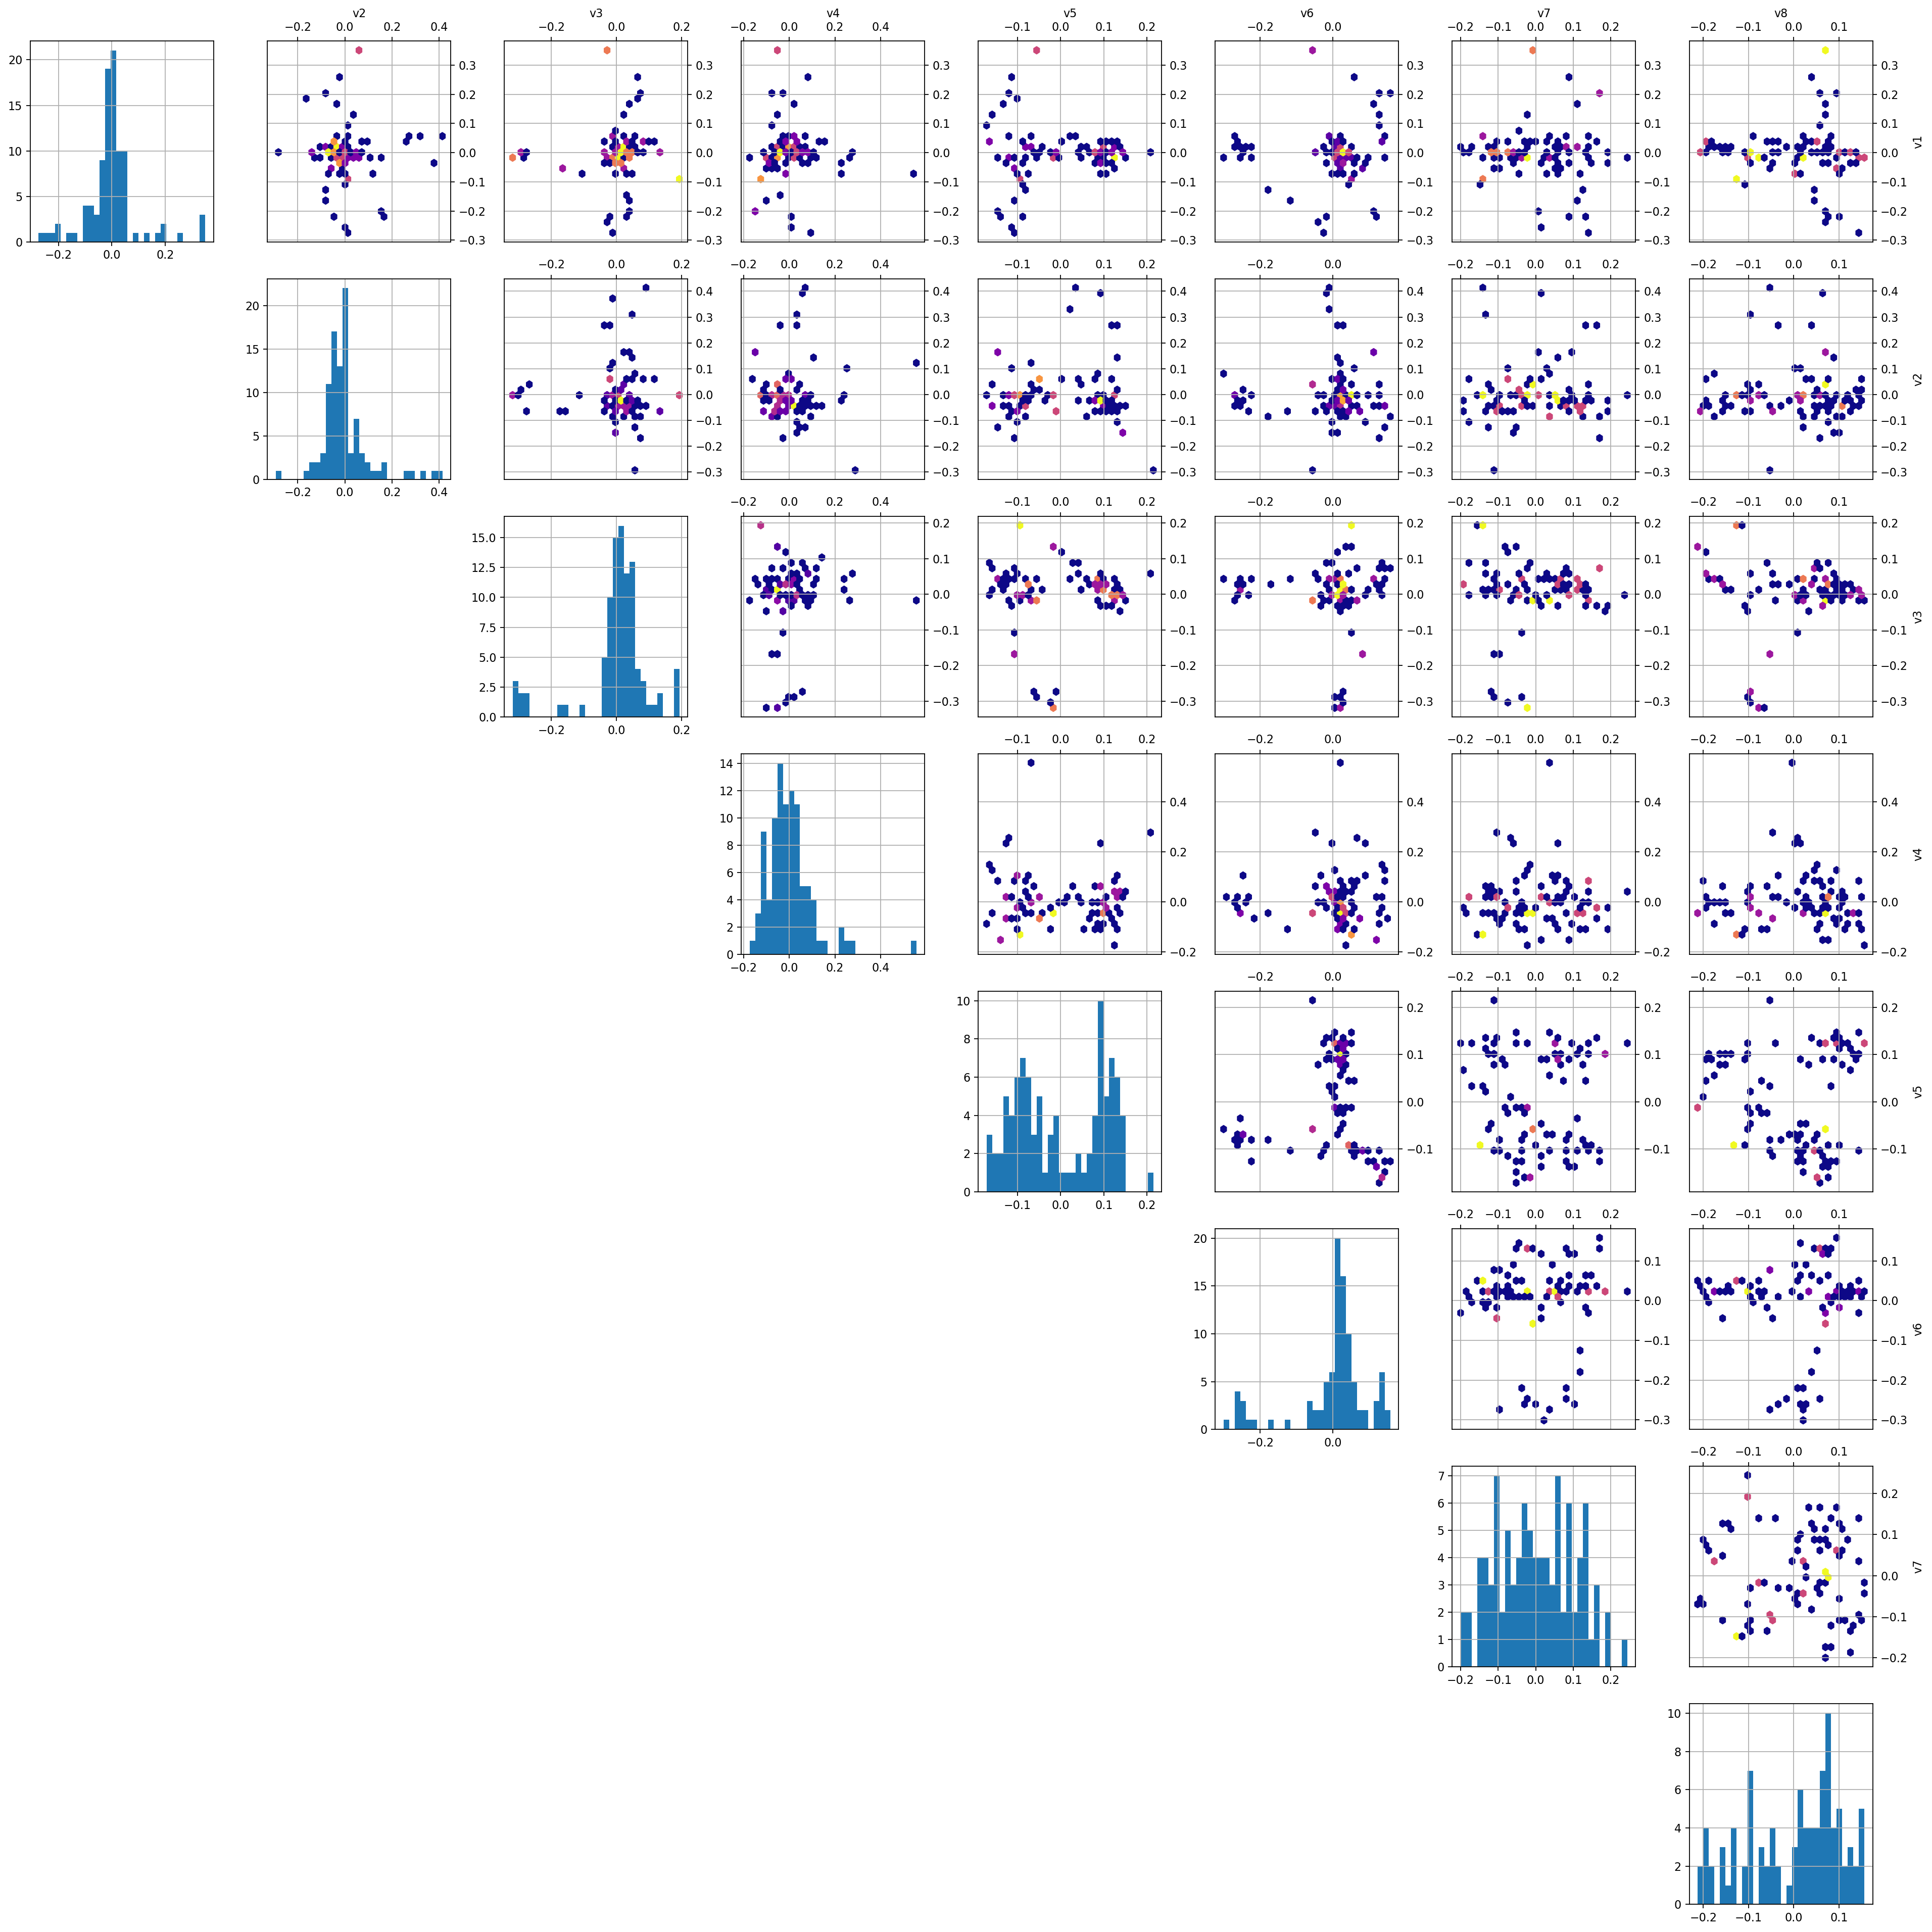

converged in  0  iterations


In [34]:
traj_new,ids_new = cmpnt.traj_filter(traj,ids,pc_thresh=pc_thresh,title=jobname)

## 2.2. State identification
Now that outliers have been removed, we can describe the structural set in terms of states

Principal Component Analysis (step 0)


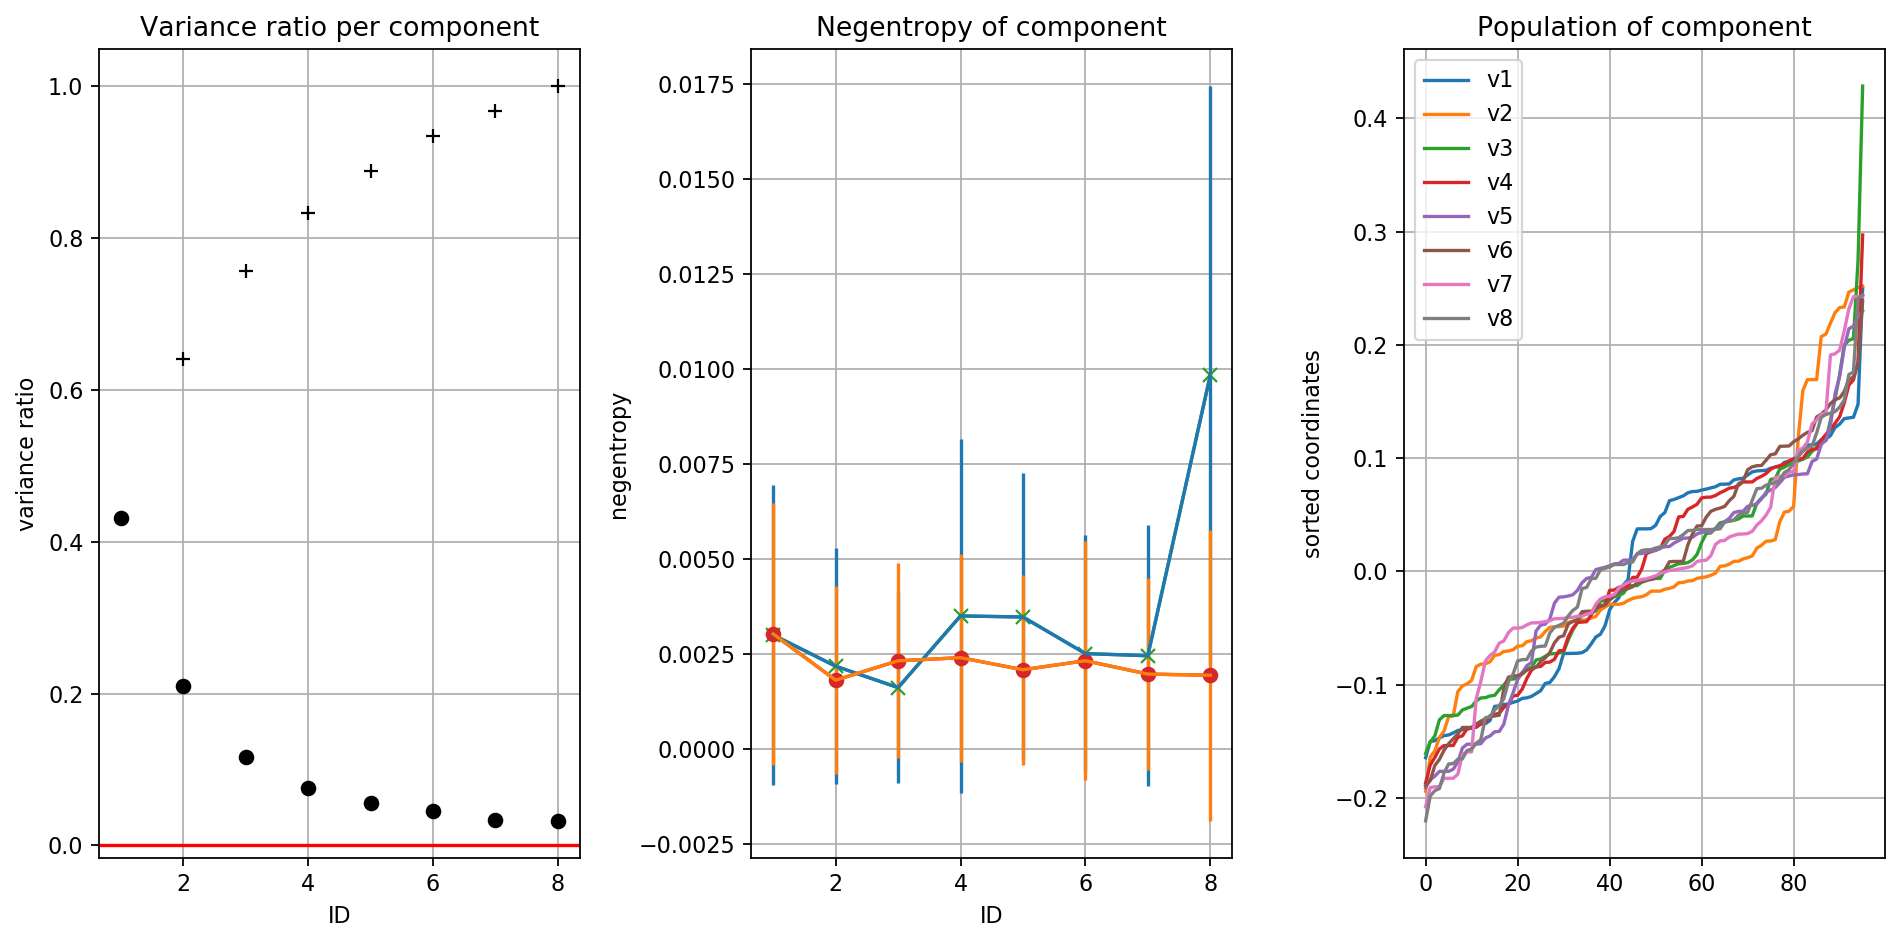

Independent Component Analysis (step 1)


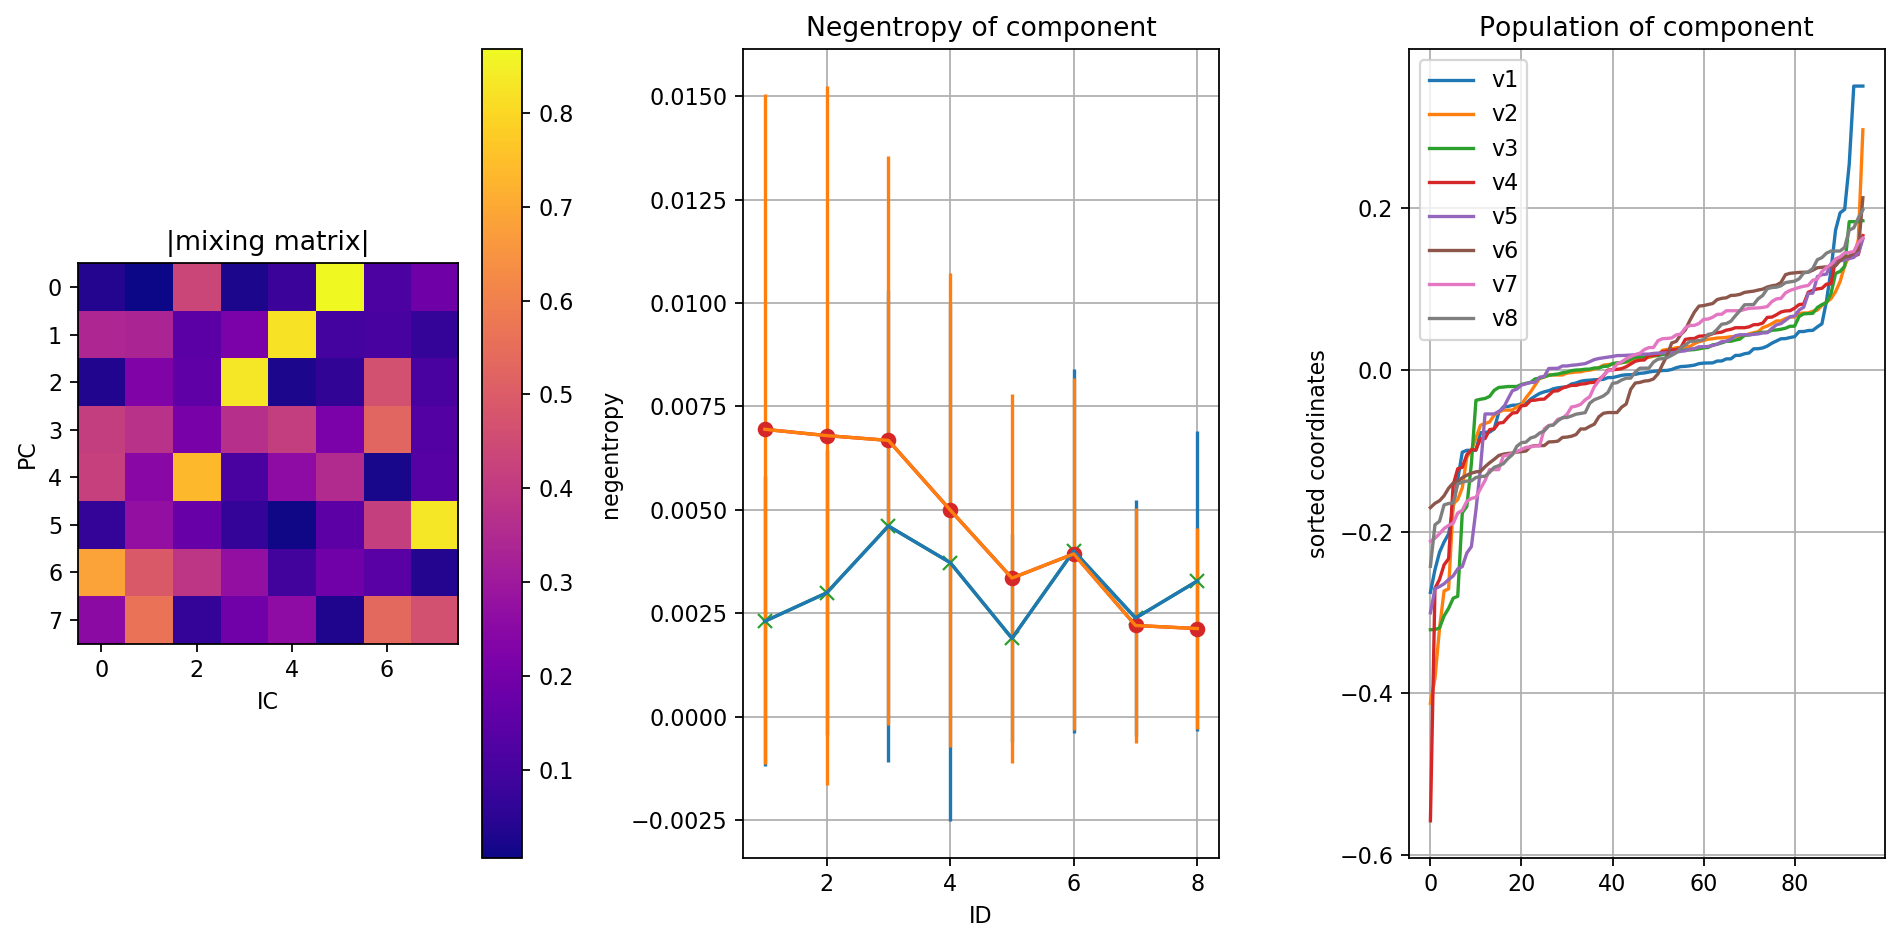

projection of data in component space


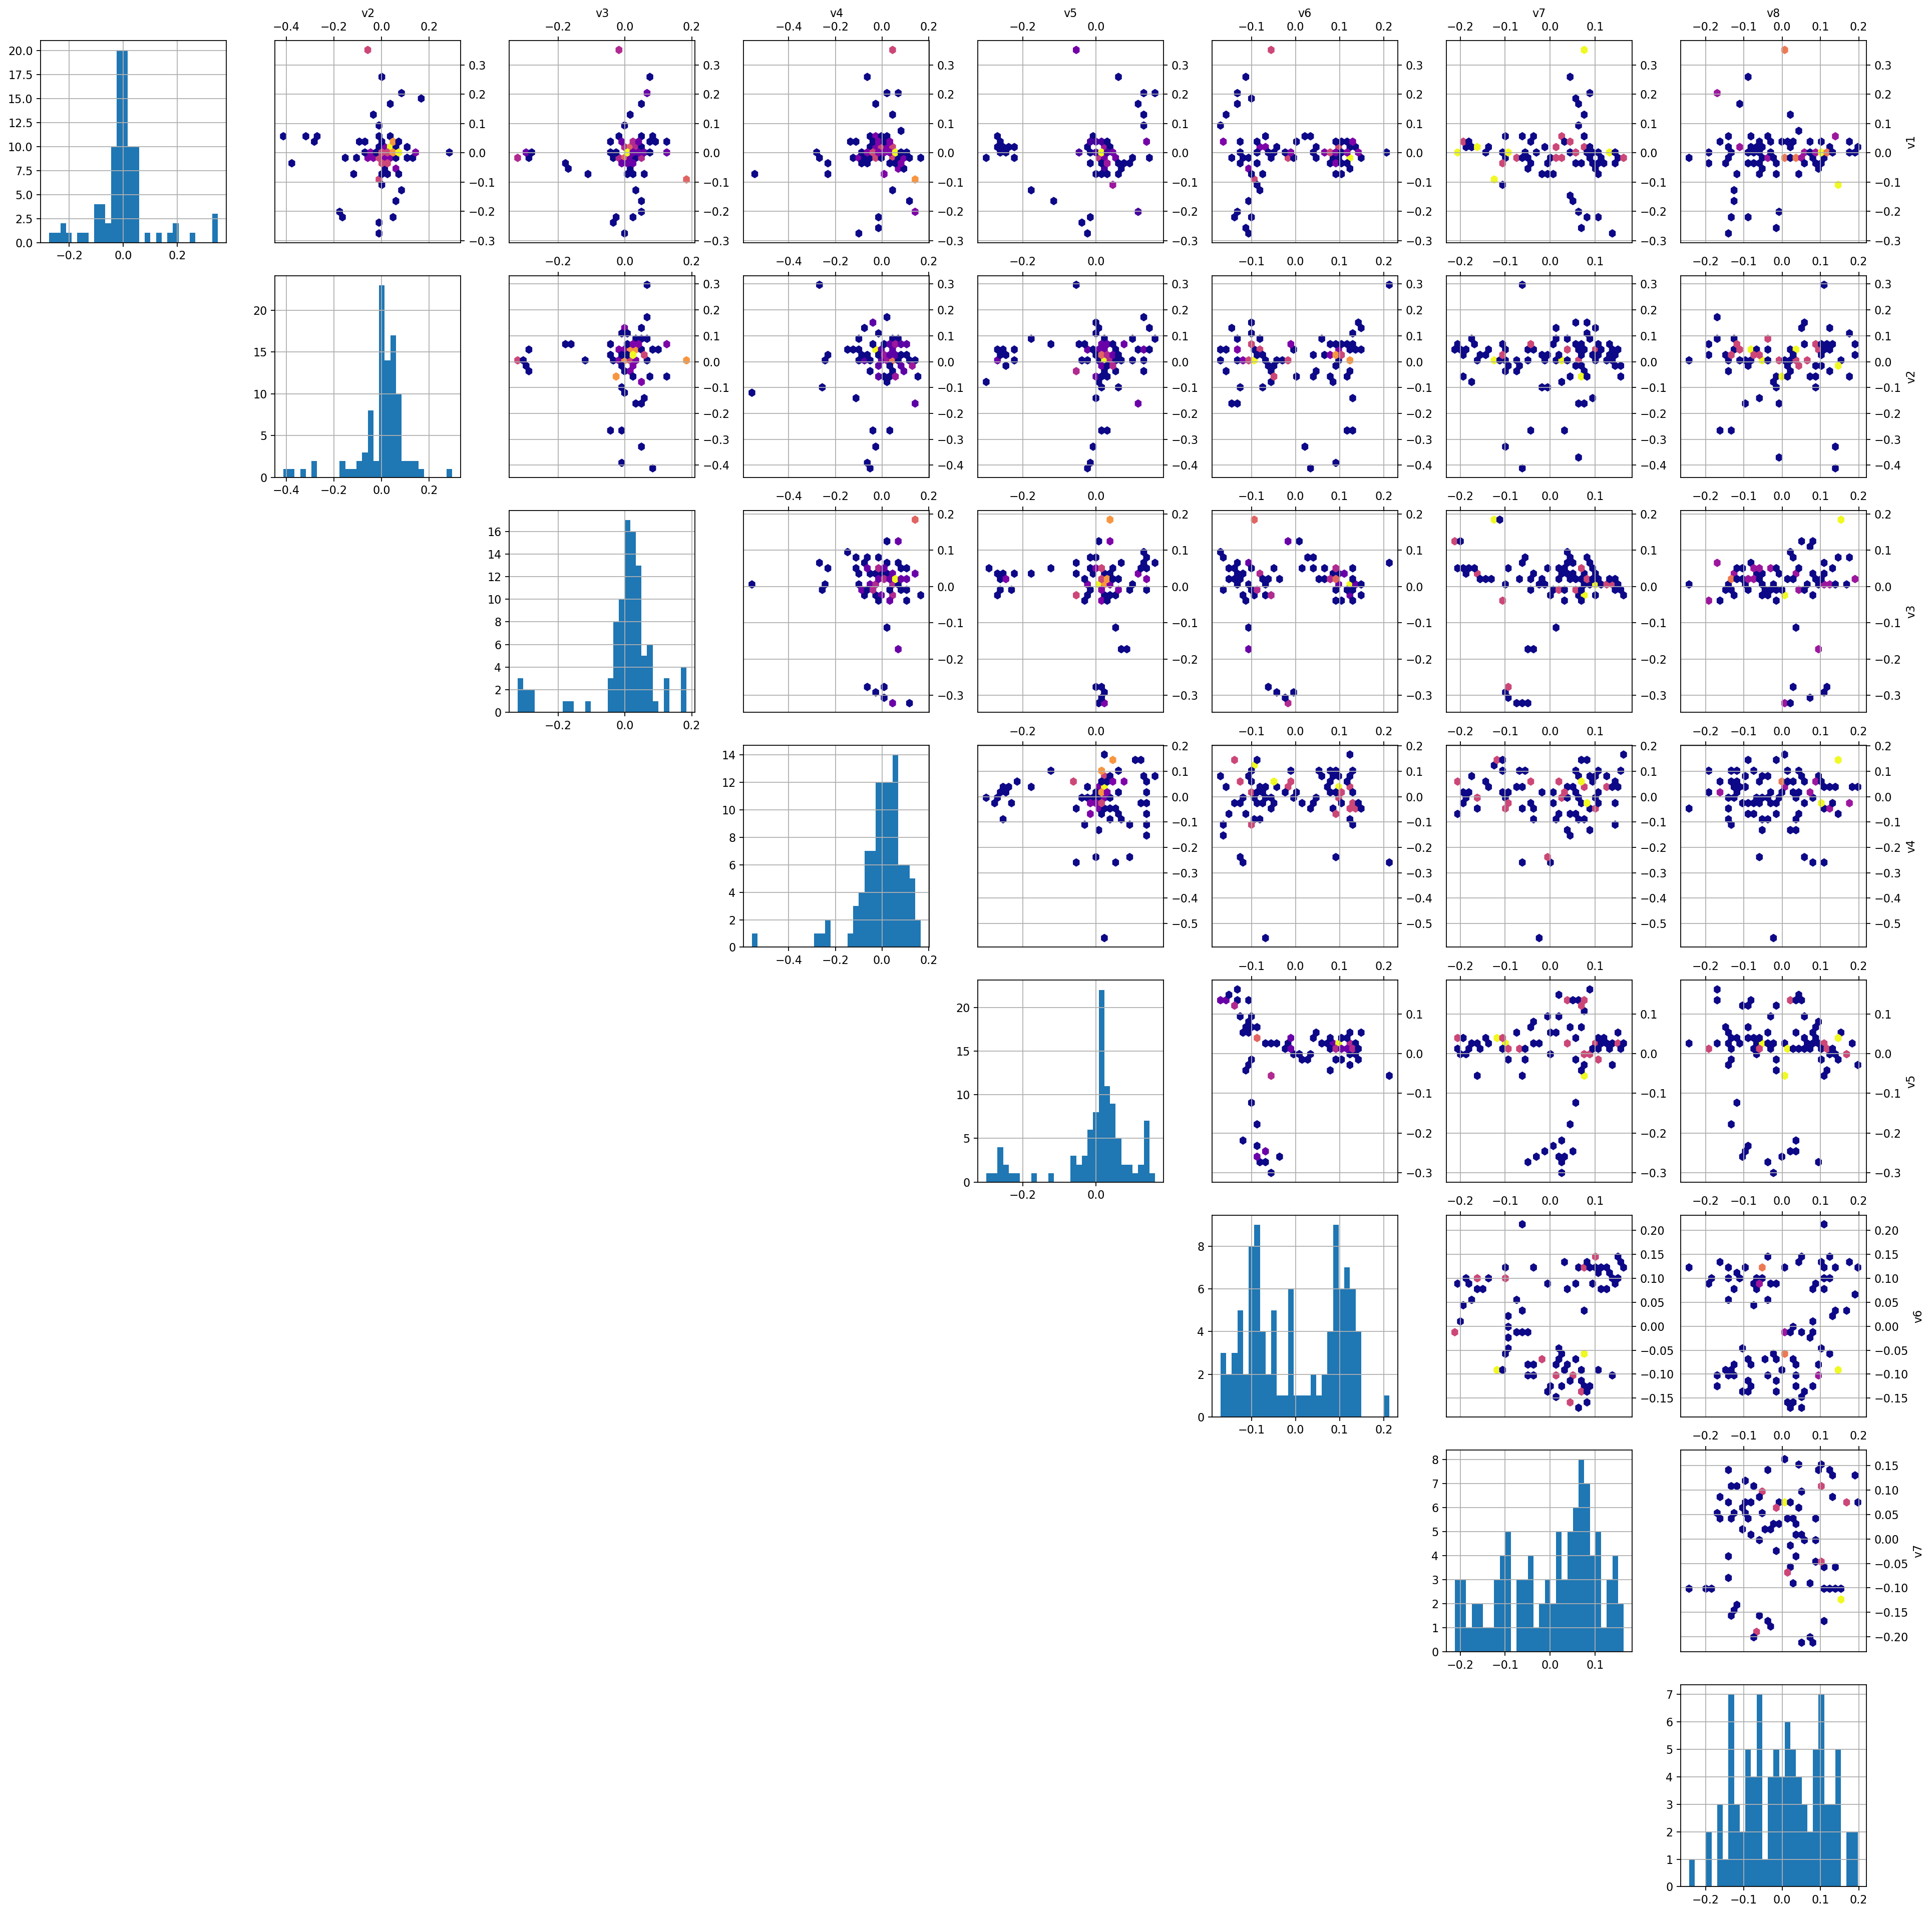

In [35]:
v_ica, m_ica, x_ica = cmpnt.traj_analyses(traj_new,ids_new,analysis_type='ica',pc_thresh=pc_thresh)

### clustering:

In [36]:
l,v,m,x,negent_ave,negent_var = cmpnt.traj_cluster_run(traj_new,ids_new,pc_thresh=pc_thresh)

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


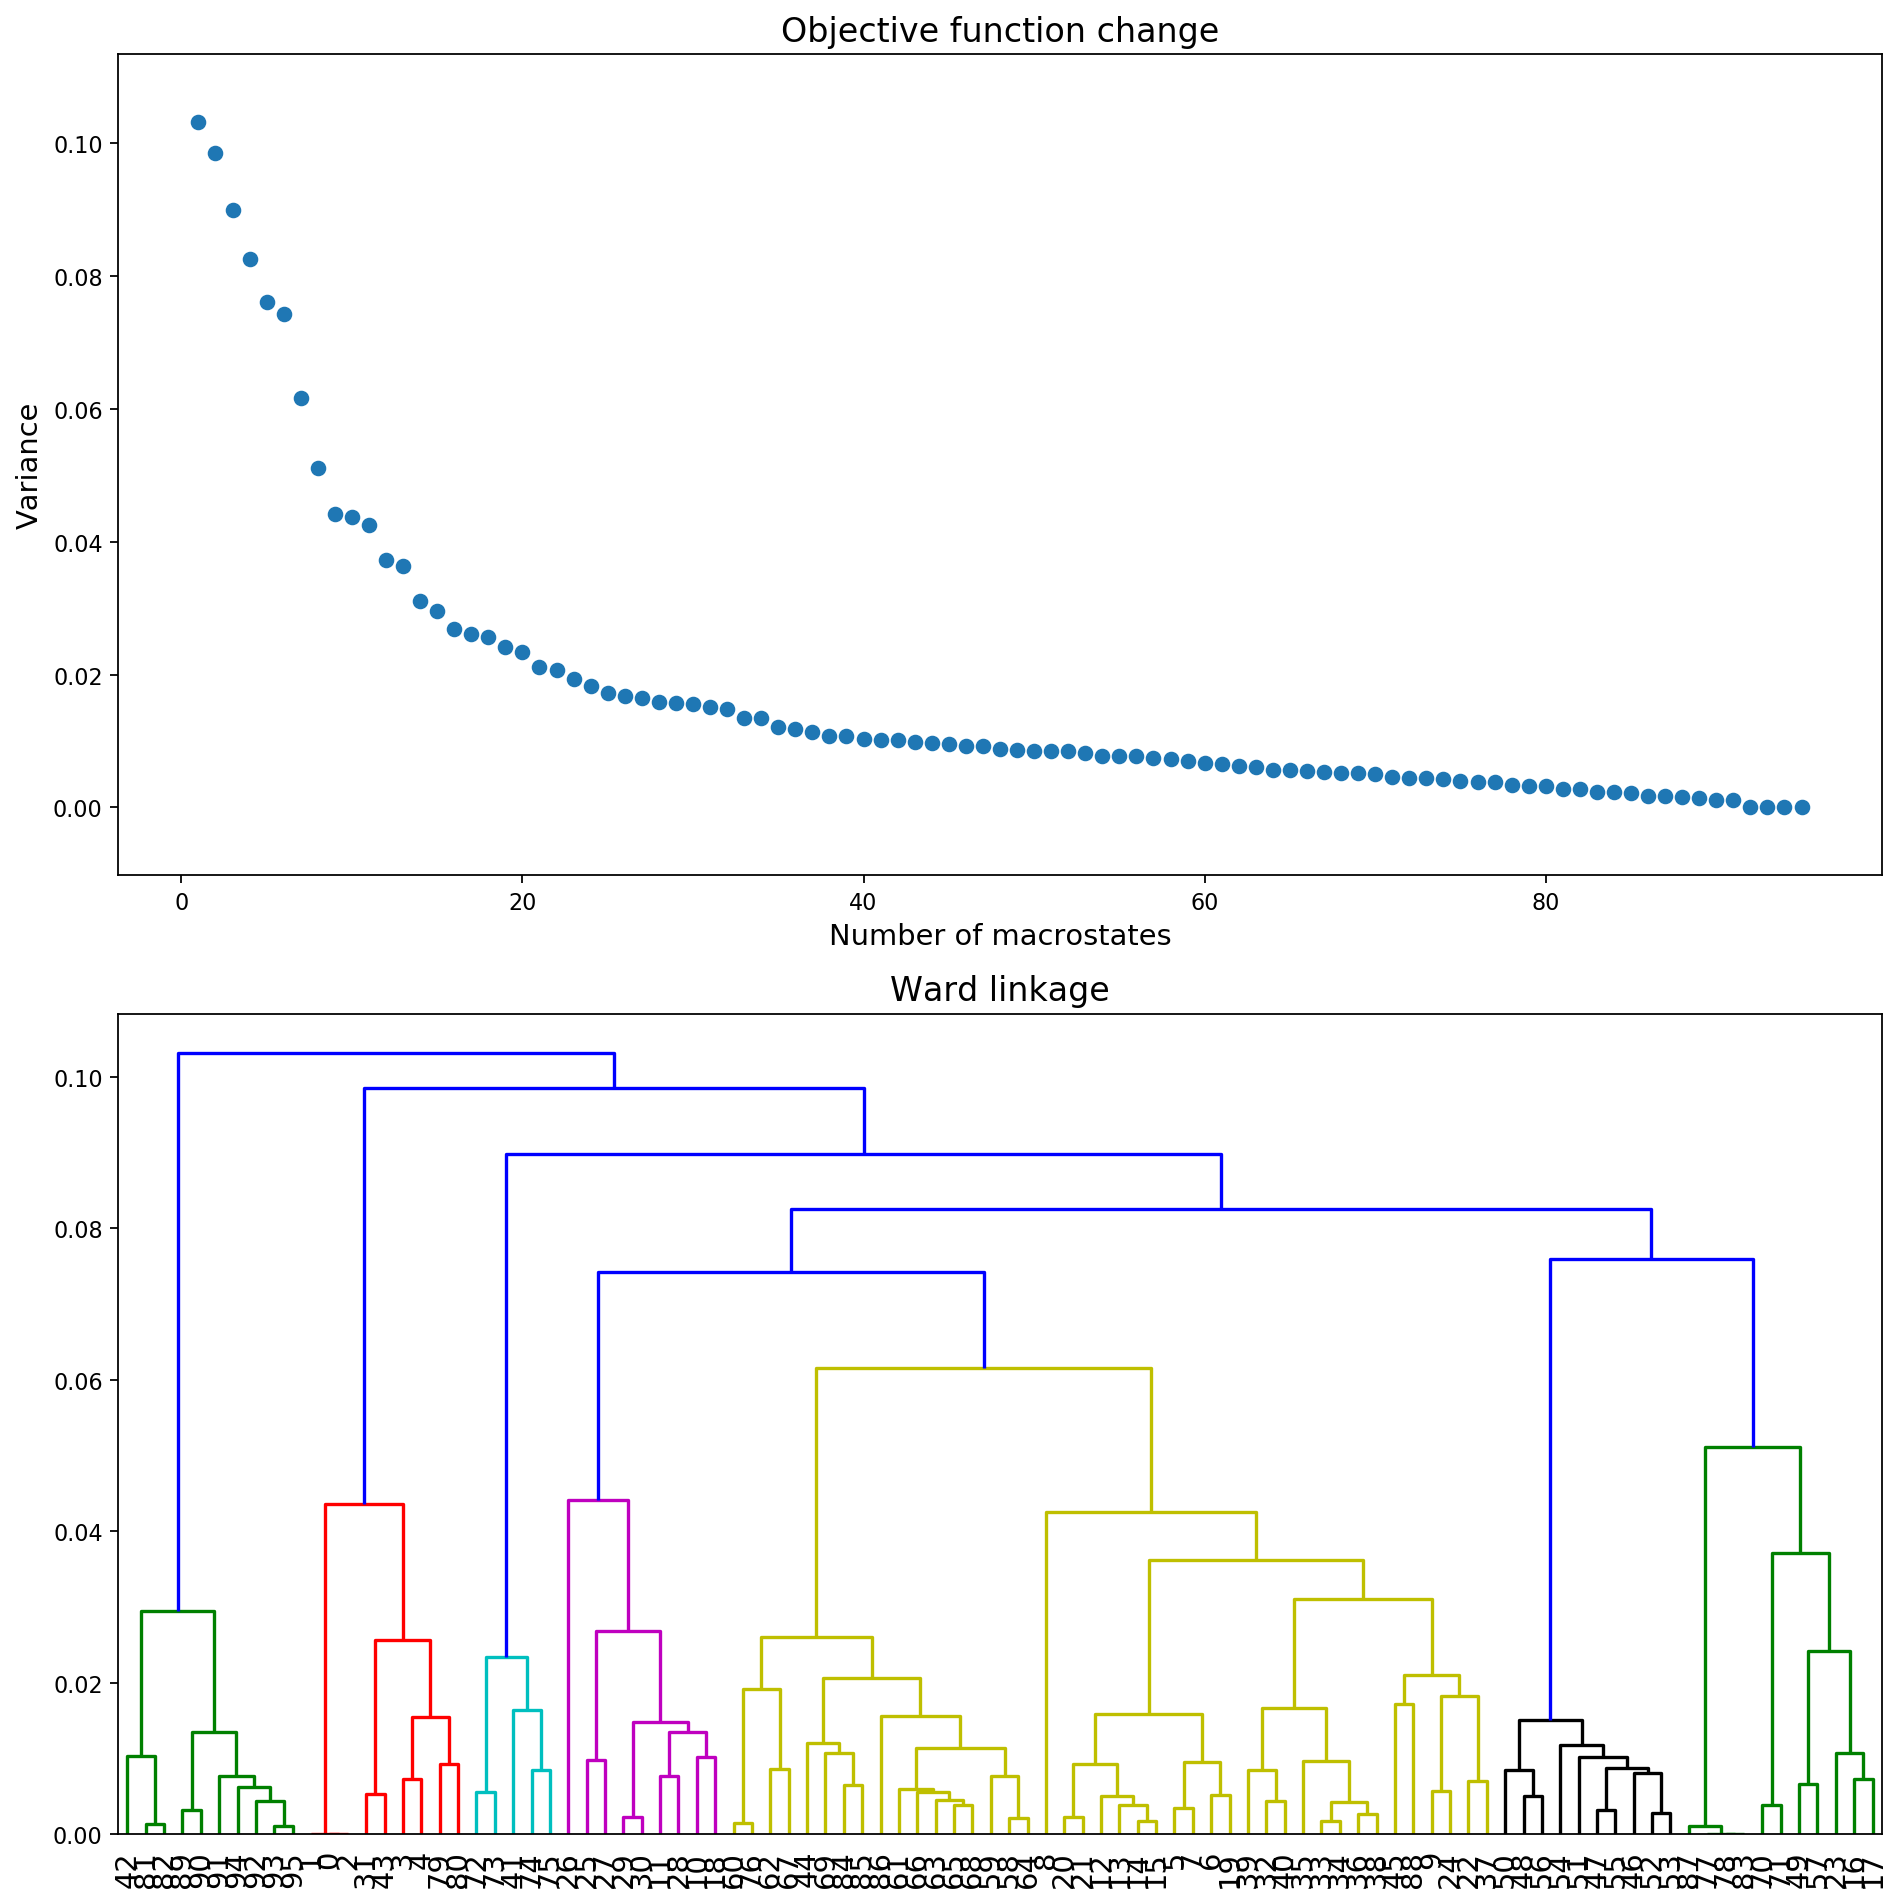

In [37]:
cmpnt.plot_cluster(l,x)

In [38]:
n_clusters=9

In [39]:
cmpnt.traj_cluster_split(traj_new,ids_new,l,n_clusters,title=jobname)

> init_c2_c2_c4_cluster_1
wrote  init_c2_c2_c4_cluster_1.pdb  :  ['3m3y+00.cif' '4y52+00.cif' '4y7n+00.cif' '5w4u+00.cif' '5w51+00.cif'
 '6blo+00.cif' '6blp+00.cif' '6bm2+00.cif' '6bm4+00.cif' '6bqf+00.cif']
wrote  init_c2_c2_c4_cluster_1_mean.pdb  :  ['3m3y+00.cif' '4y52+00.cif' '4y7n+00.cif' '5w4u+00.cif' '5w51+00.cif'
 '6blo+00.cif' '6blp+00.cif' '6bm2+00.cif' '6bm4+00.cif' '6bqf+00.cif']
> init_c2_c2_c4_cluster_2
wrote  init_c2_c2_c4_cluster_2.pdb  :  ['1i6h+00.cif' '1nik+00.cif' '1r9s+00.cif' '1r9t+00.cif' '1sfo+00.cif'
 '3gtq+00.cif' '3m4o+00.cif' '4x67+00.cif' '4x6a+00.cif']
wrote  init_c2_c2_c4_cluster_2_mean.pdb  :  ['1i6h+00.cif' '1nik+00.cif' '1r9s+00.cif' '1r9t+00.cif' '1sfo+00.cif'
 '3gtq+00.cif' '3m4o+00.cif' '4x67+00.cif' '4x6a+00.cif']
> init_c2_c2_c4_cluster_3
wrote  init_c2_c2_c4_cluster_3.pdb  :  ['3k1f+00.cif' '4bxx+00.cif' '4bxz+00.cif' '4by1+00.cif' '4by7+00.cif']
wrote  init_c2_c2_c4_cluster_3_mean.pdb  :  ['3k1f+00.cif' '4bxx+00.cif' '4bxz+00.cif' '4by1+00.cif' 

Principal Component Analysis (step 0)


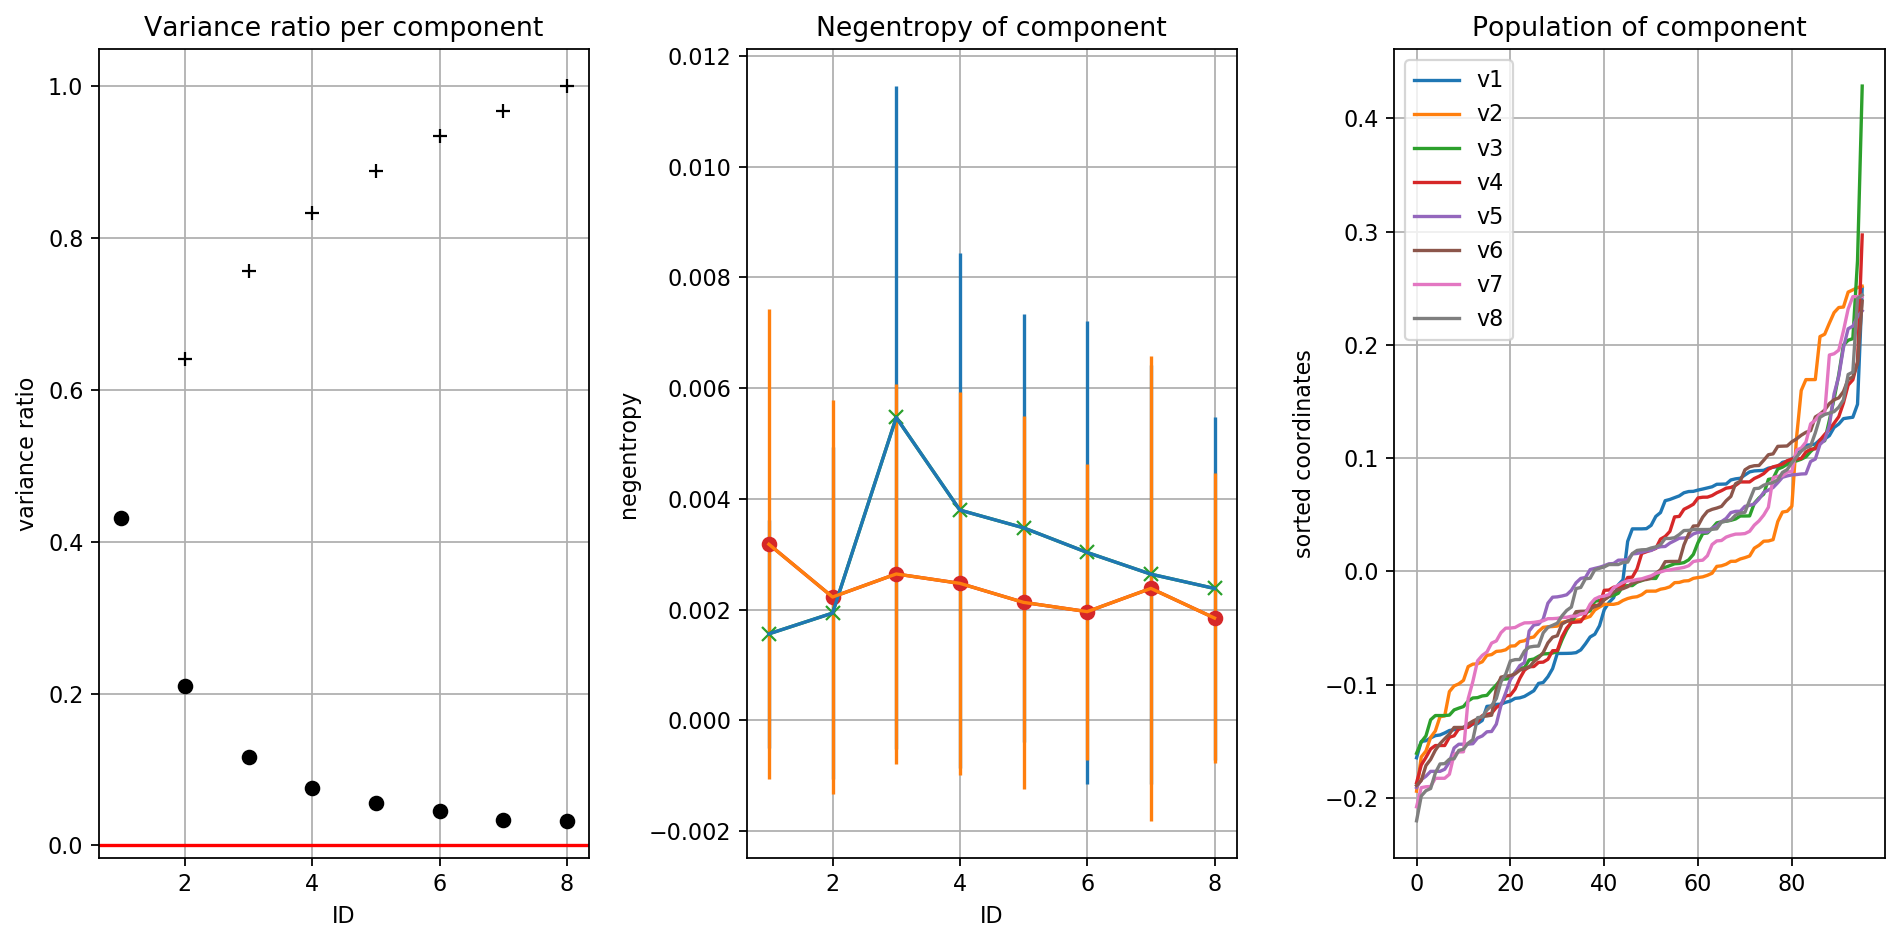

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Independent Component Analysis (step 1)


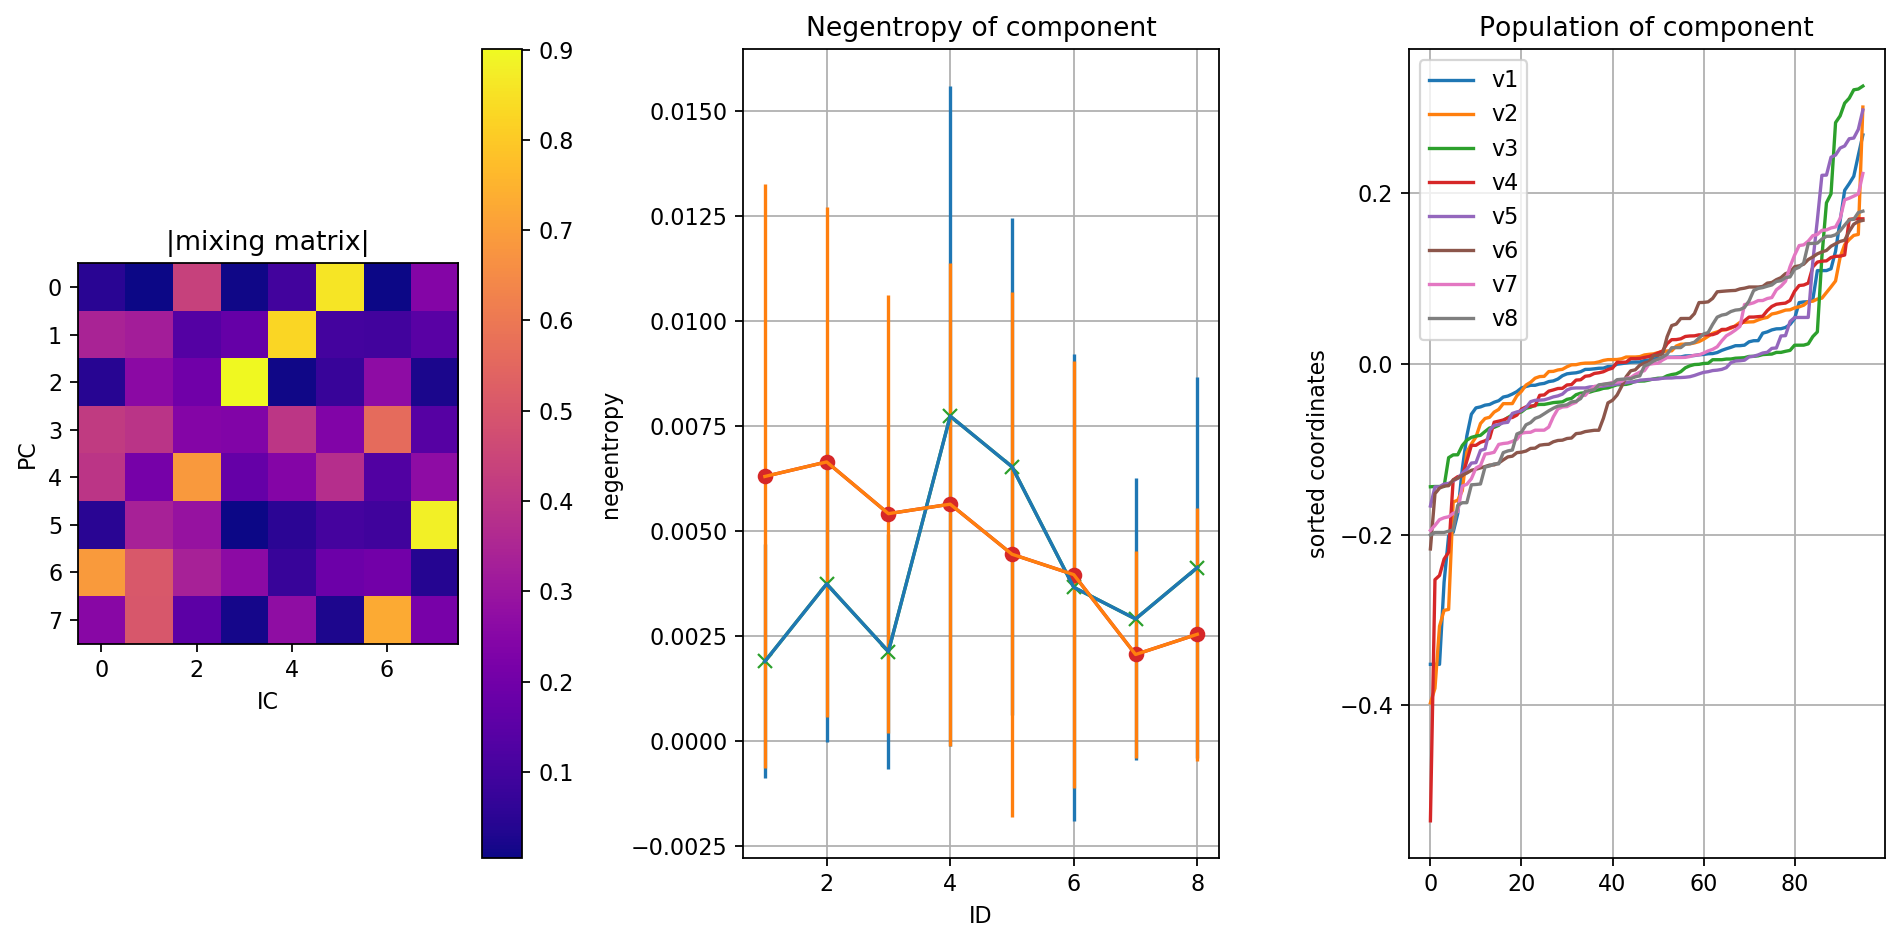

projection of data in component space


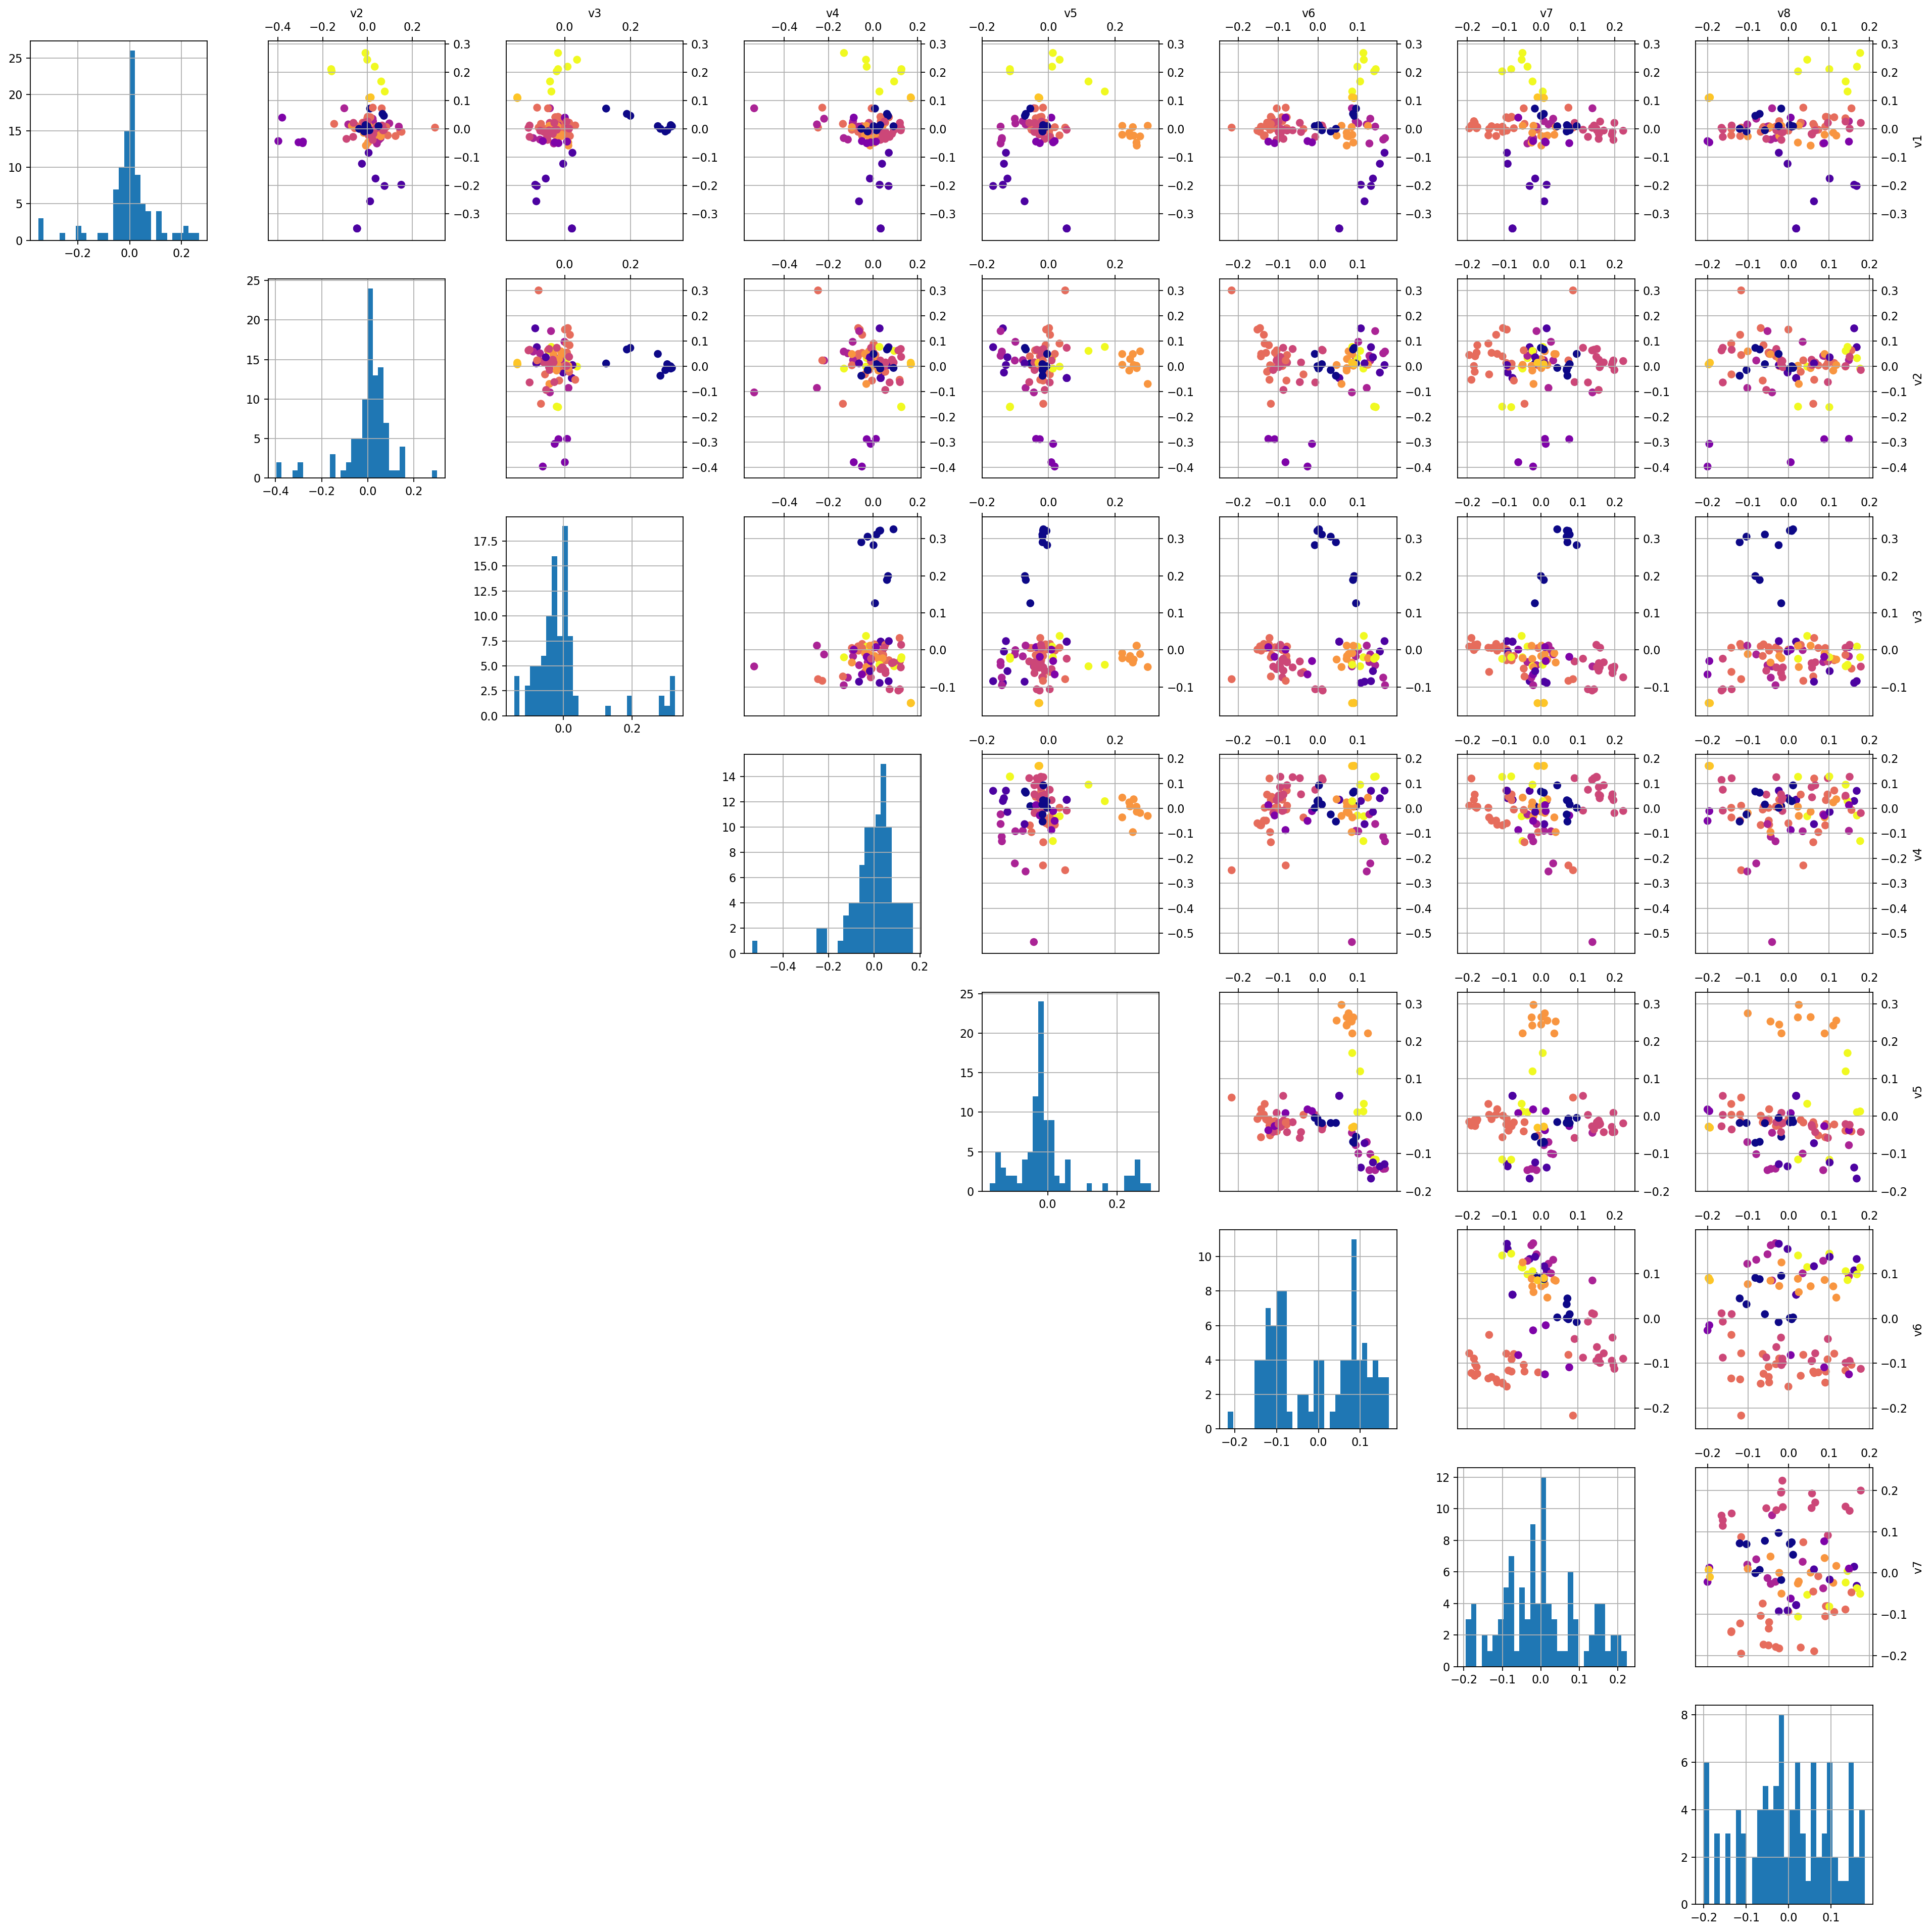

In [40]:
assignment = cmpnt.get_assignment(l,n_clusters)
v_ica, m_ica, x_ica = cmpnt.traj_analyses(traj_new,ids_new,analysis_type='ica',pc_thresh=pc_thresh,c=assignment)

Now write trajs (oscillatory and sorted), and try to map a cluster with an IC (maybe the COM of the cluster in IC space; also give color map above)